<a href="https://colab.research.google.com/github/rohinish404/learning_pytorch/blob/master/cifar_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
print(torchvision.__version__)
     

2.0.0+cu118
0.15.1+cu118


In [3]:
first_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:

from torchvision import datasets
train_data = datasets.CIFAR10(
    root = "data",
    train=True,
    download=True,
    transform=first_transform,
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download=True,
    transform=first_transform,
    target_transform=None
)
 

100%|██████████| 170498071/170498071 [00:03<00:00, 53743641.56it/s]


Extracting data/cifar-10-python.tar.gz to data


100%|██████████| 26421880/26421880 [00:02<00:00, 12719497.75it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 226267.66it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4212344.65it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15291980.87it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
len(train_data),len(test_data)

(50000, 10000)

In [6]:
classes = train_data.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
image1, label1 = train_data[0]
image1, label1
     

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

(-0.5, 31.5, 31.5, -0.5)

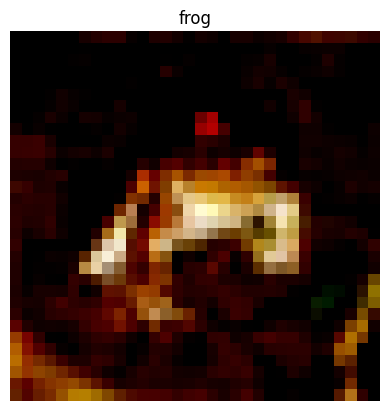

In [8]:
plt.imshow(image1.squeeze(dim=0).permute(1,2,0))
plt.title(classes[label1])
plt.axis(False)

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

In [10]:
len(train_dataloader)

1563

In [11]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape

torch.Size([32, 3, 32, 32])

In [12]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
output.shape

torch.Size([3, 1024])

In [13]:
import torch
from torch import nn

class CIFARModelV1(nn.Module):
  def __init__(self,input_shape:int,
               output_shape:int,
               hidden_units:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*8*8,
                  out_features = output_shape)
    )
  def forward(self,x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    print(x.shape)
    return x

In [14]:
torch.manual_seed(42)
model_1 = CIFARModelV1(input_shape=3,
                              hidden_units=10,
                              output_shape=len(classes)
                              )
     

In [15]:
model_1

CIFARModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)

In [16]:
img,label = train_features_batch[0],train_labels_batch[0]
img.shape

torch.Size([3, 32, 32])

In [18]:
rand_image_tensor = torch.randn(size=(3,32,32))
model_1(rand_image_tensor.unsqueeze(0))

torch.Size([1, 10, 16, 16])
torch.Size([1, 10, 8, 8])
torch.Size([1, 10])


tensor([[-0.0563, -0.0556, -0.0086, -0.0228,  0.0471, -0.0099, -0.0387, -0.0738,
          0.0240, -0.0150]], grad_fn=<AddmmBackward0>)